In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/london-bike-sharing-dataset/london_merged.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
#데이터의 타입과 구조

print('데이터의 구조는:', df.shape)
print('데이터의 타입은:', df.dtypes)
print('데이터의 칼럼은:', df.columns)

데이터의 구조는: (17414, 10)
데이터의 타입은: timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은: Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [5]:
#데이터의 결측치
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

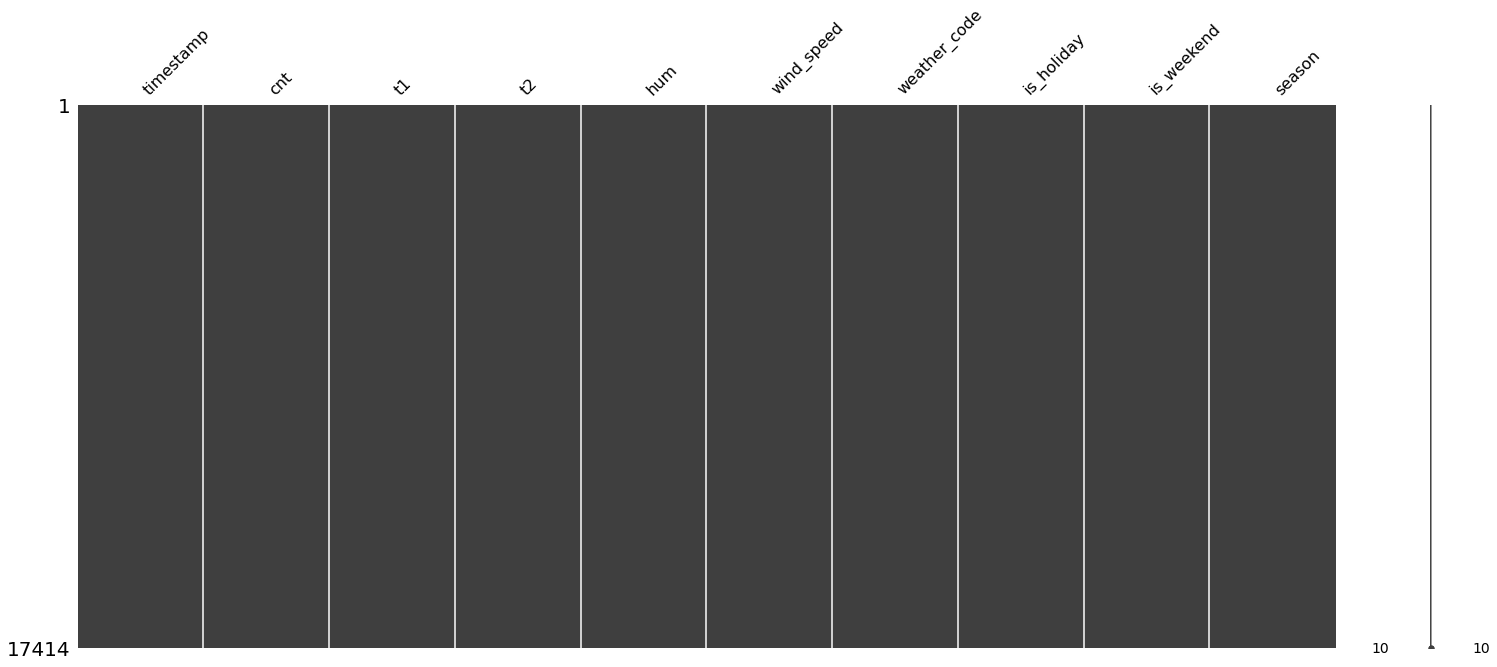

In [6]:
#데이터 결측치 시각화
msno.matrix(df)
plt.show()

In [7]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [8]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='cnt'>

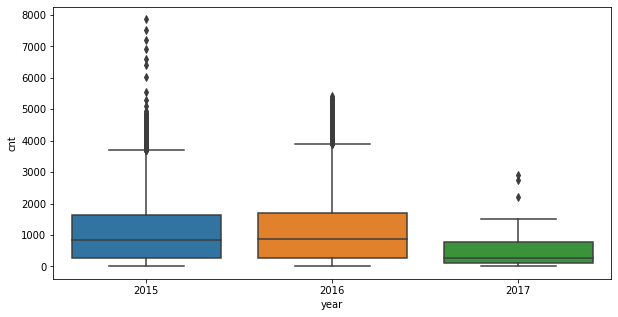

In [9]:
# 연도별(year) 자전거 이용객(cnt)
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['year'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='month', ylabel='cnt'>

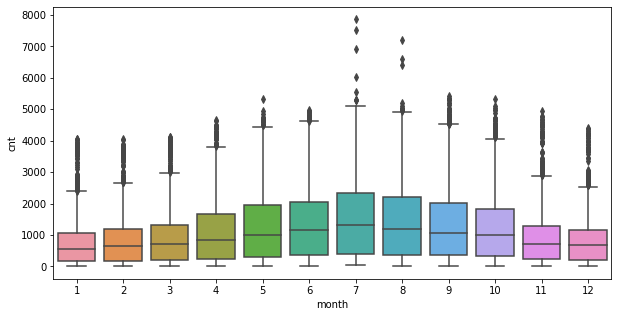

In [10]:
# 월별(month) 자전거 이용객(cnt)
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['month'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dayofweek', ylabel='cnt'>

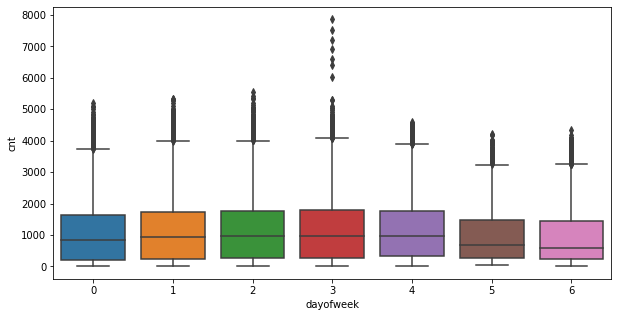

In [11]:
# 요일별(dayofweek) 자전거 이용객(cnt)
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['dayofweek'], df['cnt'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='cnt'>

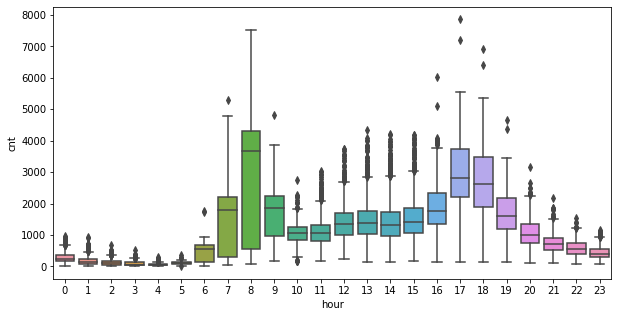

In [12]:
# 시간별(hour) 자전거 이용객(cnt)
a, b = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(df['hour'], df['cnt'])

In [13]:
# 그래프 함수 만들기

def plot_bar(data, feature):
    fig = plt.figure(figsize=(12,3))
    sns.barplot(x=feature, y='cnt', data=data, palette='Set3') # orient='V'

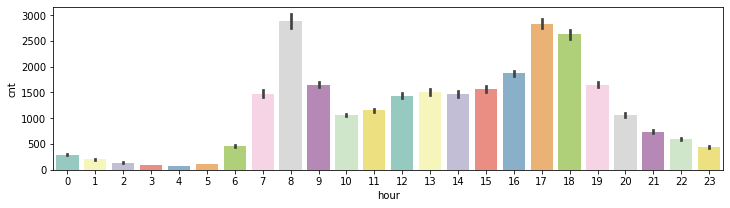

In [14]:
plot_bar(df, 'hour')

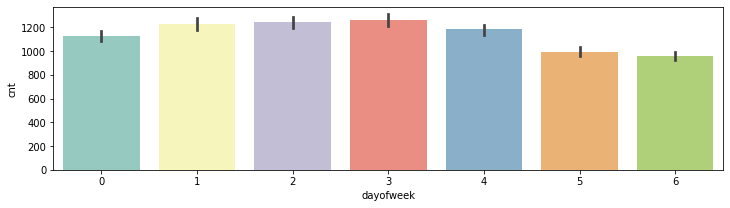

In [15]:
plot_bar(df, 'dayofweek')

In [16]:
# 아웃라이어(이상치) 제거 (시그마)

def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [17]:
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거전:', df.shape)
print('이상치 제거후:', df_out.shape)

이상치 제거전: (17414, 14)
이상치 제거후: (17265, 14)


In [18]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
year                     int64
month                    int64
dayofweek                int64
hour                     int64
dtype: object

In [19]:
# 카테고리형으로 변경
df_out['weather_code'] = df_out['weather_code'].astype('category')
df_out['season'] = df_out['season'].astype('category')
df_out['year'] = df_out['year'].astype('category')
df_out['month'] = df_out['month'].astype('category')
df_out['hour'] = df_out['hour'].astype('category')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
df_out.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday             float64
is_weekend             float64
season                category
year                  category
month                 category
dayofweek                int64
hour                  category
dtype: object

In [21]:
df_out['season']

/opt/conda/lib/python3.7/site-packages/pandas/io/formats/format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
17409    3.0
17410    3.0
17411    3.0
17412    3.0
17413    3.0
Name: season, Length: 17265, dtype: category
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]

In [22]:
# 더미 처리(이진수로 변경해줌)

df_out = pd.get_dummies(df_out, columns=['weather_code', 'season', 'year', 'month', 'hour'])
df_out.head()

,timestamp,cnt,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,0.0,1.0,6,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,0.0,1.0,6,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_out.shape

(17265, 59)

In [24]:
# 독립 변수와 종속 변수 분리

df_y = df_out['cnt'] # 종속 변수
df_x = df_out.drop(['timestamp', 'cnt'], axis=1) # timestamp와 cnt 외에는 독립변수
df_x.head()

,t1,t2,hum,wind_speed,is_holiday,is_weekend,dayofweek,weather_code_1.0,weather_code_2.0,weather_code_3.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,3.0,2.0,93.0,6.0,0.0,1.0,6,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2.5,93.0,5.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.5,2.5,96.5,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,100.0,0.0,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,0.0,93.0,6.5,0.0,1.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_y.head()

0    182
1    138
2    134
3     72
4     47
Name: cnt, dtype: int64

In [26]:
# 훈련용, 테스트용 데이터 분리

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, random_state=66, test_size=0.3, shuffle=False)

In [27]:
print('x_train의 구조는:', x_train.shape)
print('y_train의 구조는:', y_train.shape)

print('x_test의 구조는:', x_test.shape)
print('y_test의 구조는:', y_test.shape)

x_train의 구조는: (12085, 57)
y_train의 구조는: (12085,)
x_test의 구조는: (5180, 57)
y_test의 구조는: (5180,)


In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [29]:
model = Sequential()
model.add(Dense(units=160, activation='relu', input_dim=57))
model.add(Dense(units=60, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 160)               9280      
_________________________________________________________________
dense_1 (Dense)              (None, 60)                9660      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 20,181
Trainable params: 20,181
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
early_stopping = EarlyStopping(monitor='loss', patience=5, mode='min')
history = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
10876/10876 [==============================] - 15s 1ms/step - loss: 635.1667 - mae: 635.1667 - val_loss: 502.2426 - val_mae: 502.2426
Epoch 2/50
10876/10876 [==============================] - 14s 1ms/step - loss: 341.5841 - mae: 341.5841 - val_loss: 272.3001 - val_mae: 272.3001
Epoch 3/50
10876/10876 [==============================] - 14s 1ms/step - loss: 247.4127 - mae: 247.4127 - val_loss: 257.9760 - val_mae: 257.9760
Epoch 4/50
10876/10876 [==============================] - 14s 1ms/step - loss: 220.4673 - mae: 220.4673 - val_loss: 197.9128 - val_mae: 197.9128
Epoch 5/50
10876/10876 [==============================] - 14s 1ms/step - loss: 194.1804 - mae: 194.1804 - val_loss: 218.6799 - val_mae: 218.6799
Epoch 6/50
10876/10876 [==============================] - 14s 1ms/step - loss: 173.9686 - mae: 173.9686 - val_loss: 221.6868 - val_mae: 221.6868
Epoch 7/50
10876/10876 [==============================] - 14s 1ms/step - loss: 162.3116 - mae: 162.3116 - val_loss: 158.5154 - val

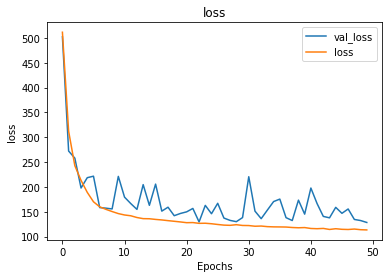

In [32]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['val_loss', 'loss'])
plt.show()

In [33]:
y_predict = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error

def RMSE(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE', RMSE(y_test, y_predict))

RMSE 259.7224234379217


In [35]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=16)
rf.fit(x_train, y_train)
rf_result = rf.predict(x_test)
print('RMSE', RMSE(y_test, rf_result))

RMSE 303.6417775662534


In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100, random_state=16)
xgb.fit(x_train, y_train)
xgb_result = xgb.predict(x_test)
print('RMSE', RMSE(y_test, xgb_result))

RMSE 307.09072320247844


In [37]:
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_estimators=100, random_state=16)
lgb.fit(x_train, y_train)
lgb_result = lgb.predict(x_test)
print('RMSE', RMSE(y_test, lgb_result))

RMSE 323.2746495922864


In [38]:
xgb = pd.DataFrame(xgb_result)
rf = pd.DataFrame(rf_result)
dnn = pd.DataFrame(y_predict)
lgb = pd.DataFrame(lgb_result)
compare = pd.DataFrame(y_test).reset_index(drop=True)

In [39]:
compare['xgb'] = xgb
compare['rf'] = rf
compare['dnn'] = dnn
compare['lgb'] = lgb
compare.head()

,cnt,xgb,rf,dnn,lgb
0,1885,1803.070923,1700.24,2235.213135,1830.345197
1,2175,2228.828125,1803.82,2556.668457,2133.296789
2,2485,2598.814697,2191.37,2702.204834,2590.899050
3,2882,2683.149658,2206.67,2511.386963,2613.783086
4,2965,2590.693848,2276.35,2598.535156,2306.341169


<AxesSubplot:xlabel='cnt', ylabel='Density'>

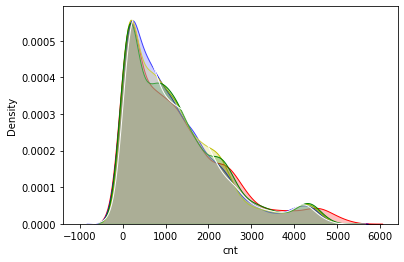

In [40]:
sns.kdeplot(compare['cnt'], shade=True, color='r')
sns.kdeplot(compare['xgb'], shade=True, color='b')
sns.kdeplot(compare['rf'], shade=True, color='y')
sns.kdeplot(compare['dnn'], shade=True, color='g')
sns.kdeplot(compare['lgb'], shade=True, color='w')